<a href="https://colab.research.google.com/github/ElenaSaveleva/PROJECT-3.-EDA-Feature-Engineering/blob/main/baseline_saveleva_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.4 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import category_encoders as ce
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics         

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session        

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/data/hotels_train.csv')
df_train

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,10,10,8.8,"[' Leisure trip ', ' Group ', ' Club Double or...",106 day,51.494028,-0.191050
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171 day,48.192379,16.399451
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,8.3,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,51.520795,-0.131084
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [8]:
df_test = pd.read_csv('/content/drive/MyDrive/data/hotels_test.csv')
df_test

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128930,Viale Monza 132 Distretto Viale Monza 20127 Mi...,53,2/3/2016,8.1,Best Western Antares Hotel Concorde,Greece,No Negative,0,984,nice breakfast,4,14,"[' Business trip ', ' Couple ', ' Double Room ...",547 day,45.502453,9.221836
128931,Duc De Medinaceli 8 Ciutat Vella 08002 Barcelo...,46,6/18/2016,7.8,Medinaceli,United States of America,No Negative,0,523,Beautiful historic hotel in great location in...,24,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",411 day,41.378169,2.178663
128932,Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...,260,7/6/2017,8.0,Suite Hotel 900 m zur Oper,New Zealand,No coffee in complimentary coffee in the room...,31,3461,The size of the room the courtyard and the lo...,23,1,"[' Business trip ', ' Solo traveler ', ' Singl...",28 days,48.193523,16.366915
128933,Corso Concordia 1 Milan City Center 20129 Mila...,159,12/26/2015,9.0,Ch teau Monfort Relais Ch teaux,Australia,No Negative,0,1053,Staff very polite and helpful Hotel well loca...,20,7,"[' Leisure trip ', ' Solo traveler ', ' Execut...",586 day,45.468236,9.207380


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [10]:
sample_submission = pd.read_csv('/content/drive/MyDrive/data/submission.csv')

In [11]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [12]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [13]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, поэтому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

<ipython-input-13-b6f74da4283b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [15]:
# Проанализируем признак "дата отзыва"
# переведем формат признака "review_date" в формат даты и времени
data['review_date'] = pd.to_datetime(data['review_date'])

In [16]:
# Выделим из даты отзыва год и месяц в отдельные столбцы
data['review_year'] = data['review_date'].dt.year
data['review_month'] = data['review_date'].dt.month

# удалим признак даты из данных
data.drop('review_date', axis=1 , inplace=True)

In [17]:
# Посмотрим на количество отзывов относительно месяца
data_month = data['review_month'].value_counts().reset_index().rename(columns={'index' : 'month number', 'review_month' : 'count'})
display(data_month)

,month number,count
0,8,50672
1,7,49318
2,5,46490
3,10,43843
4,6,42896
5,4,42883
6,9,42428
7,1,42151
8,3,41110
9,12,39607


In [18]:
# Построим для признака 'review_month' столбчатую диаграмму
fig = px.bar(data_month,
            x='month number',
            y='count',
            text_auto=True,
            log_y=True)
fig.update_traces(textposition='outside')
fig.show()

In [19]:
# Создадим признак с временами года
# Функция season возвращает номер сезона
def season(month):
    if month in [3, 4, 5]: return 1 # Весна
    elif month in [6, 7, 8]: return 2 # Лето
    elif month in [12, 1, 2]: return 3 # Зима
    else:
        return 4 # Осень

data['season'] = data['review_month'].apply(season)

In [20]:
# Посмотрим на количество отзывов по временам года
data_season = data['season'].value_counts().reset_index().rename(columns={'index' : 'season_number', 'season' : 'count'})
display(data_season)

,season_number,count
0,2,142886
1,1,130483
2,4,122241
3,3,120128


In [21]:
# Построим столбчатую диаграмму для признака
fig = px.bar(data_season,
            x='season_number',
            y='count',
            text_auto=True,
            log_y=True)  
fig.show()

In [22]:
# Проанализируем отзывы пользователей 
# Посмотрим негативные отзывы "negative_review"
data['negative_review'].value_counts()

No Negative                                                                                                                                                                                                             127890
 Nothing                                                                                                                                                                                                                 14295
 Nothing                                                                                                                                                                                                                  4236
 nothing                                                                                                                                                                                                                  2225
 N A                                                                                                        

In [23]:
data['neg_neutral'] = data['negative_review'].apply(lambda x: '0' if x == 'No Negative' or x == ' Nothing' or x == ' nothing'  or x == ' N A' or x == ' Nothing ' else 'neg')

In [24]:
data['neg_neutral'].value_counts()

neg    366055
0      149683
Name: neg_neutral, dtype: int64

In [25]:
# Проанализируем отзывы пользователей 
# Посмотрим негативные отзывы "negative_review"
data['positive_review'].value_counts()

No Positive                                                                                                                                                35946
 Location                                                                                                                                                   9222
 Everything                                                                                                                                                 2284
 location                                                                                                                                                   1677
 Nothing                                                                                                                                                    1243
                                                                                                                                                           ...  
 Lots places to eat near Also near

In [26]:
data['pos_neutral'] = data['positive_review'].apply(lambda x: '1' if x == 'No Positive' or x == ' Nothing' else 'pos')

In [27]:
data['pos_neutral'].value_counts()

pos    478549
1       37189
Name: pos_neutral, dtype: int64

In [28]:
# Удалим признаки позитивной и негативной оценки
data.drop(['negative_review', 'positive_review'], axis=1 , inplace=True)

In [29]:
data['tags'].describe()

count                                                515738
unique                                                55242
top       [' Leisure trip ', ' Couple ', ' Double Room '...
freq                                                   5101
Name: tags, dtype: object

In [30]:
# Проанализируем признак "теги"
# Создадим признак с количеством слов в тегах
data['cnt_words_tag'] = data['tags'].apply(lambda x: len(list(x.split(','))))
data['cnt_words_tag'].head(10)

0    4
1    4
2    5
3    4
4    5
5    4
6    4
7    5
8    3
9    4
Name: cnt_words_tag, dtype: int64

In [31]:
# Составим словарь из уникальных тегов и посчитаем их количество
# Функция возвращает словарь, в котором ключом является уникальный тег,
# а значением количество его повторений
count_dict = {}
for tags_list in data['tags']:
    tags = ''.join(tags_list)
    tags = tags.replace("'", "")
    tags = tags.replace("[", "")
    tags = tags.replace("]", "")
    tags = tags.split(",")
    for tag in tags:
        tag = tag.strip()
        if tag in count_dict:
            count_dict[tag] += 1
        else:
            count_dict[tag] = 1
print(len(count_dict))            


2428


In [32]:
# Создадим признак "Тип поездки", если тип поездки не указан, то = 0
def type_trip(tags):
    if 'Leisure trip' in tags: return '1' 
    elif 'Business trip' in tags: return '2'
    return 0

data['type_trip'] = data['tags'].apply(type_trip)

In [33]:
# Создадим признак "Количество гостей"
def reviewer_count(tags):
    reviewer_list = ['Solo traveler', 
                  'Travelers with friends', 
                  'Couple', 
                  'Group', 
                  'Family with older children', 
                  'Family with young children'] 
    for tag in reviewer_list:
        if tag in tags: return tag
    return 0 

data['reviewer_count'] = data['tags'].apply(reviewer_count)

In [34]:
# Посмотрим на количество отзывов относительно количества гостей
data['reviewer_count'].value_counts()

Couple                        252294
Solo traveler                 108545
Group                          65392
Family with young children     61015
Family with older children     26349
Travelers with friends          2143
Name: reviewer_count, dtype: int64

In [35]:
# Из тегов выделим на сколько ночей чаще всего останавливаются гости в отелях,для этого создадим функцию
def number_of_nights(arg):
    tags_list = arg.split(',')
    for tag in tags_list:
        idx = tag.find('night')
        if idx > 0:
            word_list = tag.split()
            for word in word_list:
                if word.isnumeric():
                    return int(word)
                
# создадим признак "количество ночей в отеле"           
data['number_of_nights'] = data['tags'].apply(number_of_nights)

In [36]:
# Пустые значения признака "количество ночей в отеле" заменим на медиану
data['number_of_nights'] = data['number_of_nights'].fillna(data['number_of_nights'].median())

In [37]:
# Посмотрим на количество ночей в отеле относительно гостей
data['number_of_nights'].value_counts()

1.0     193644
2.0     134128
3.0      95825
4.0      47817
5.0      20843
6.0       9776
7.0       7399
8.0       2502
9.0       1293
10.0       889
11.0       418
12.0       316
14.0       247
13.0       246
15.0       117
16.0        57
17.0        42
18.0        33
19.0        29
21.0        23
20.0        19
27.0        11
30.0        11
23.0        10
22.0        10
25.0         7
26.0         7
28.0         7
24.0         6
29.0         5
31.0         1
Name: number_of_nights, dtype: int64

In [38]:
# Проанализируем признак адреса отеля
data['hotel_address'].value_counts()

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
8 rue Fr d ric Bastiat 8th arr 75008 Paris France                                   12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: hotel_address, Length: 1493, dtype: i

In [39]:
# Извлечем название страны и города в отдельные признаки, создадим для этого функцию и применим ее к столбцу с адресом
def city_and_country(address):
    words_list = address.split(' ')
    if 'United Kingdom' in address:
        return('Uni ted Kingdom', words_list[-5])
    else:
        return(words_list[-1], words_list[-2])

data[['country_hotel', 'city_hotel']] = data['hotel_address'].apply(city_and_country).apply(pd.Series)

In [40]:
# Выведем результат
data.country_hotel.value_counts()

Uni ted Kingdom    262301
Spain               60149
France              59928
Netherlands         57214
Austria             38939
Italy               37207
Name: country_hotel, dtype: int64

In [41]:
data.city_hotel.value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: city_hotel, dtype: int64

In [42]:
# Удалим признак адреса и страны так как каждая из страна представлена один городом

data.drop(['hotel_address', 'country_hotel'], axis=1 , inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   hotel_name                                  515738 non-null  object 
 3   reviewer_nationality                        515738 non-null  object 
 4   review_total_negative_word_counts           515738 non-null  int64  
 5   total_number_of_reviews                     515738 non-null  int64  
 6   review_total_positive_word_counts           515738 non-null  int64  
 7   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 8   tags                                        515738 non-null  object 
 9   days_since_review                           515738 non-null  object 
 

In [44]:
# Проанализируем признак страны путешественника
count_dict = {}
for country in data.reviewer_nationality:
    country = country.strip()
    if country in count_dict:
        count_dict[country] += 1
    else:
        count_dict[country] = 1
print(len(count_dict))
print(count_dict)

227
{'United Kingdom': 245246, 'Belgium': 6031, 'Sweden': 3368, 'United States of America': 35437, 'Ecuador': 61, 'Netherlands': 8772, 'Ireland': 14827, 'Canada': 7894, 'Norway': 2383, 'Bulgaria': 1314, 'Italy': 6114, 'Australia': 21686, 'Seychelles': 21, 'Kuwait': 4920, 'Saudi Arabia': 8951, 'Czech Republic': 2311, 'France': 7296, 'Germany': 7941, 'South Africa': 3821, 'United Arab Emirates': 10235, 'Greece': 3406, 'Spain': 4737, 'Switzerland': 8678, 'Macedonia': 282, 'Poland': 2891, 'Bahrain': 1592, 'Qatar': 2757, 'India': 3437, 'Singapore': 3091, 'Malaysia': 1883, 'Thailand': 1880, 'Brazil': 1865, 'Crimea': 6, 'Turkey': 5444, 'Israel': 6610, '': 523, 'Lebanon': 2261, 'Romania': 4552, 'Cyprus': 1381, 'Portugal': 1839, 'Slovakia': 903, 'Jersey': 863, 'Gibraltar': 380, 'Austria': 2412, 'Kenya': 269, 'Isle of Man': 405, 'Costa Rica': 120, 'Oman': 1334, 'Hungary': 2185, 'Iceland': 933, 'Estonia': 757, 'Hong Kong': 3013, 'China': 3400, 'Malta': 1685, 'Pakistan': 916, 'Montenegro': 192, 'S

In [45]:
# Количество стран - 227. 
# Сократим количество стран, выделив 20 наиболее повторяющихся, остальные обозначим как other
countries = data.reviewer_nationality.value_counts()
countries_list = countries[:20].index

def country_freq(country):
    if country in countries_list:
        return country
    else:
        return 'other'
    
data['country_reviewer'] = data['reviewer_nationality'].apply(country_freq)
data.country_reviewer.value_counts()

 United Kingdom               245246
other                          92646
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
Name: country_reviewer, dtype: int64

In [46]:
# Посмотрим на распределение по категориям
data_nationality = data['country_reviewer'].value_counts().reset_index().rename(columns={'index' : 'nationality', 'reviewer_nationality' : 'count'})
data_nationality

,nationality,country_reviewer
0,United Kingdom,245246
1,other,92646
2,United States of America,35437
3,Australia,21686
4,Ireland,14827
5,United Arab Emirates,10235
6,Saudi Arabia,8951
7,Netherlands,8772
8,Switzerland,8678
9,Germany,7941


In [47]:
# Построим горизонтальную столбчатую диаграмму, чтобы посмотреть на распределение признака
fig = px.bar(data_nationality,
            x='country_reviewer',
            y='nationality',
            text_auto=True,
            title='Топ-10 национальностей гостей по количеству отзывов')
    
fig.show()

In [48]:
# Удалим признак reviewer_nationality
data.drop('reviewer_nationality', axis=1 , inplace=True)

In [49]:
# Проверим данные на пустые значения
data = data.fillna(0)
data.isnull().sum()

additional_number_of_scoring                  0
average_score                                 0
hotel_name                                    0
review_total_negative_word_counts             0
total_number_of_reviews                       0
review_total_positive_word_counts             0
total_number_of_reviews_reviewer_has_given    0
tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
sample                                        0
reviewer_score                                0
review_year                                   0
review_month                                  0
season                                        0
neg_neutral                                   0
pos_neutral                                   0
cnt_words_tag                                 0
type_trip                                     0
reviewer_count                          

In [50]:
# Столбцы широты и долготы содержат много пропусков. Учитывая то, что мы смогли извлечь названия стран из адреса, удалим широту и долготу

data.drop(['lat', 'lng'], axis=1 , inplace=True)

In [51]:
data['hotel_name'].nunique()

1492

In [52]:
# Признак days_since_review не являяется полезным, удалим его
# Название отеля важный признак, но ввиду их огромного количества прийдется его удалить
# признак tags удалим так как необходимую информацию получили

data.drop(['days_since_review', 'hotel_name', 'tags'], axis=1 , inplace=True)

In [53]:
# Выведем основную информацию о нечисловых признаках
data.describe(include='object')

,neg_neutral,pos_neutral,type_trip,reviewer_count,city_hotel,country_reviewer
count,515738,515738,515738,515738,515738,515738
unique,2,2,3,6,6,21
top,neg,pos,1,Couple,London,United Kingdom
freq,366055,478549,417778,252294,262301,245246


In [54]:
# Преобразуем признак "Тип поездки" в числовой
data['type_trip'] = data['type_trip'].astype('int64')

In [55]:
# Создадим список колонок с категориальными признаками
category_list = [x for x in data.columns if data[x].dtypes == 'object']
category_list

['neg_neutral',
 'pos_neutral',
 'reviewer_count',
 'city_hotel',
 'country_reviewer']

In [56]:
# Объединим категориальные признаки в датасет
data_cat = data[category_list]
data_cat

,neg_neutral,pos_neutral,reviewer_count,city_hotel,country_reviewer
0,neg,pos,Couple,Milan,United Kingdom
1,neg,1,Group,Amsterdam,Belgium
2,neg,pos,Solo traveler,Barcelona,other
3,0,pos,Couple,Milan,United States of America
4,0,pos,Solo traveler,Amsterdam,United Kingdom
...,...,...,...,...,...
515733,0,pos,Group,London,France
515734,0,pos,Couple,Vienna,Turkey
515735,neg,pos,Solo traveler,London,Netherlands
515736,0,pos,Solo traveler,London,United Arab Emirates


In [57]:
# Для выбора способа кодирования посмотрим на количество категорий в признаках
for col in data_cat.columns:
    print(f'В признаке {col} количество категорий: {data_cat[col].nunique()}')

В признаке neg_neutral количество категорий: 2
В признаке pos_neutral количество категорий: 2
В признаке reviewer_count количество категорий: 6
В признаке city_hotel количество категорий: 6
В признаке country_reviewer количество категорий: 21


In [58]:
# признак 'country_reviewer' содержит 21 категорию, поэтому здесь используем бинарное кодирование
bin_encoder = ce.BinaryEncoder(cols=['country_reviewer'])
type_bin = bin_encoder.fit_transform(data['country_reviewer'])
data = pd.concat([data, type_bin], axis=1)

In [59]:
# Удалим признак "country_reviewer"
data = data.drop("country_reviewer", axis=1)

In [60]:
# Для остальных признаков воспользуемся OneHotEncoder
# Снова создаем список категориальных признаковдля кодирования
cat_list = [x for x in data.columns if data[x].dtypes == 'object']
print(cat_list)

# Кодируем признаки с помощью OneHotEncoder
onehot = ce.OneHotEncoder(cols=cat_list, use_cat_names=True)
type_bin = onehot.fit_transform(data[cat_list])
data = pd.concat([data, type_bin], axis=1)

['neg_neutral', 'pos_neutral', 'reviewer_count', 'city_hotel']


In [61]:
# Удалим категориальные признаки
data = data.drop(cat_list, axis=1)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   sample                                      515738 non-null  int64  
 7   reviewer_score                              515738 non-null  float64
 8   review_year                                 515738 non-null  int64  
 9   review_month                                515738 non-null  int64  
 

<Axes: >

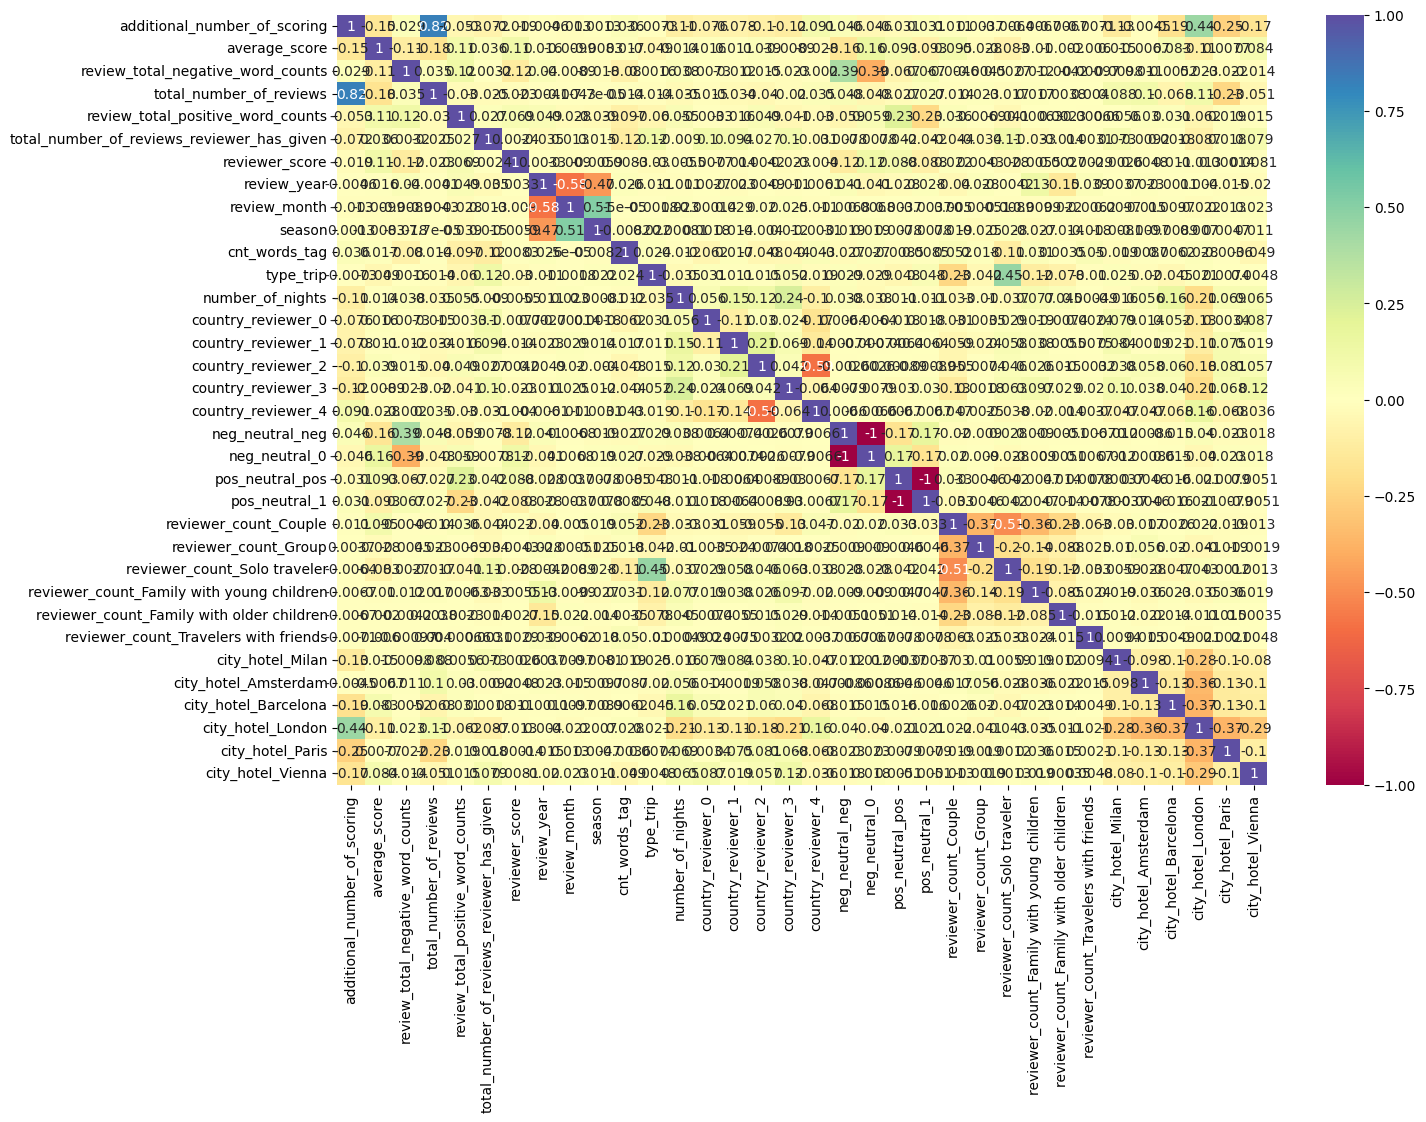

In [63]:
# Построим тепловую карту для визаулизации корреляции признаков
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True, cmap = 'Spectral')

In [64]:
# выберем и удалим признаки из пар с высоким уровнем корреляции
drop_list = ['neg_neutral_0','pos_neutral_1', 'additional_number_of_scoring']
data.drop(drop_list, axis=1 , inplace=True)
data.head(3)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,sample,reviewer_score,review_year,review_month,season,...,reviewer_count_Solo traveler,reviewer_count_Family with young children,reviewer_count_Family with older children,reviewer_count_Travelers with friends,city_hotel_Milan,city_hotel_Amsterdam,city_hotel_Barcelona,city_hotel_London,city_hotel_Paris,city_hotel_Vienna
0,8.1,52,16670,62,1,0,0.0,2017,7,2,...,0,0,0,0,1,0,0,0,0,0
1,8.6,10,5018,0,7,0,0.0,2016,12,3,...,0,0,0,0,0,1,0,0,0,0
2,8.3,3,351,5,15,0,0.0,2015,11,4,...,1,0,0,0,0,0,1,0,0,0


<Axes: >

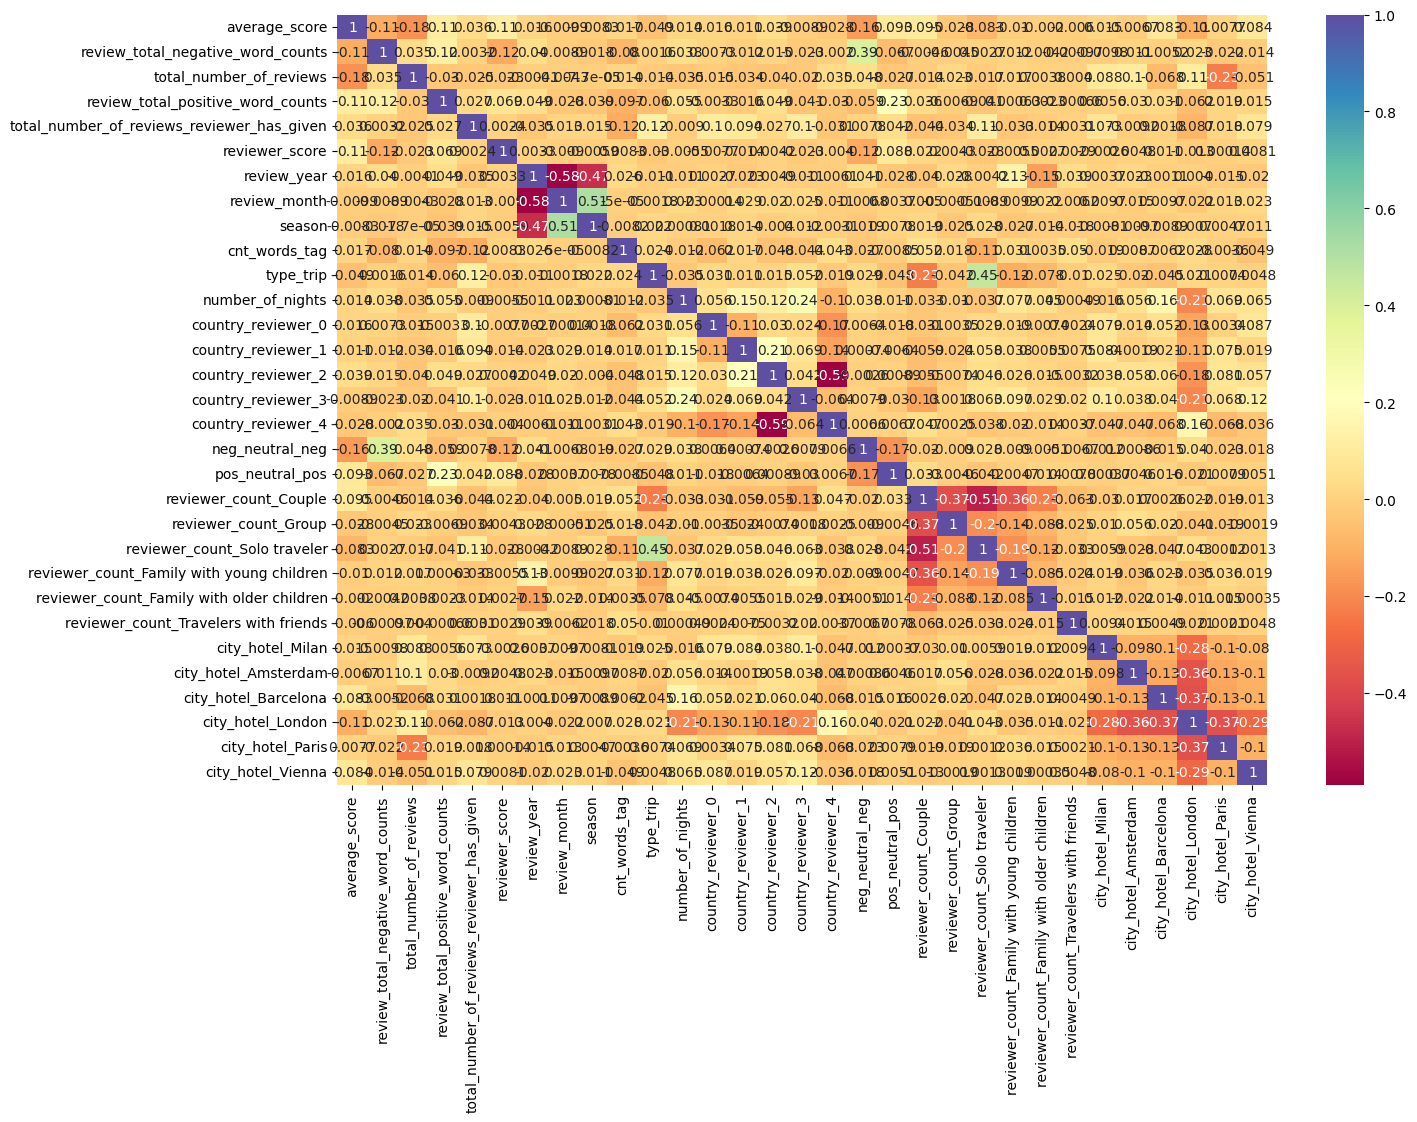

In [65]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True, cmap = 'Spectral')

In [66]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [67]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [68]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 31), (386803, 31), (386803, 30), (309442, 30), (77361, 30))

In [69]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [70]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [71]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.6s finished


In [72]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9338899597906577


<Axes: >

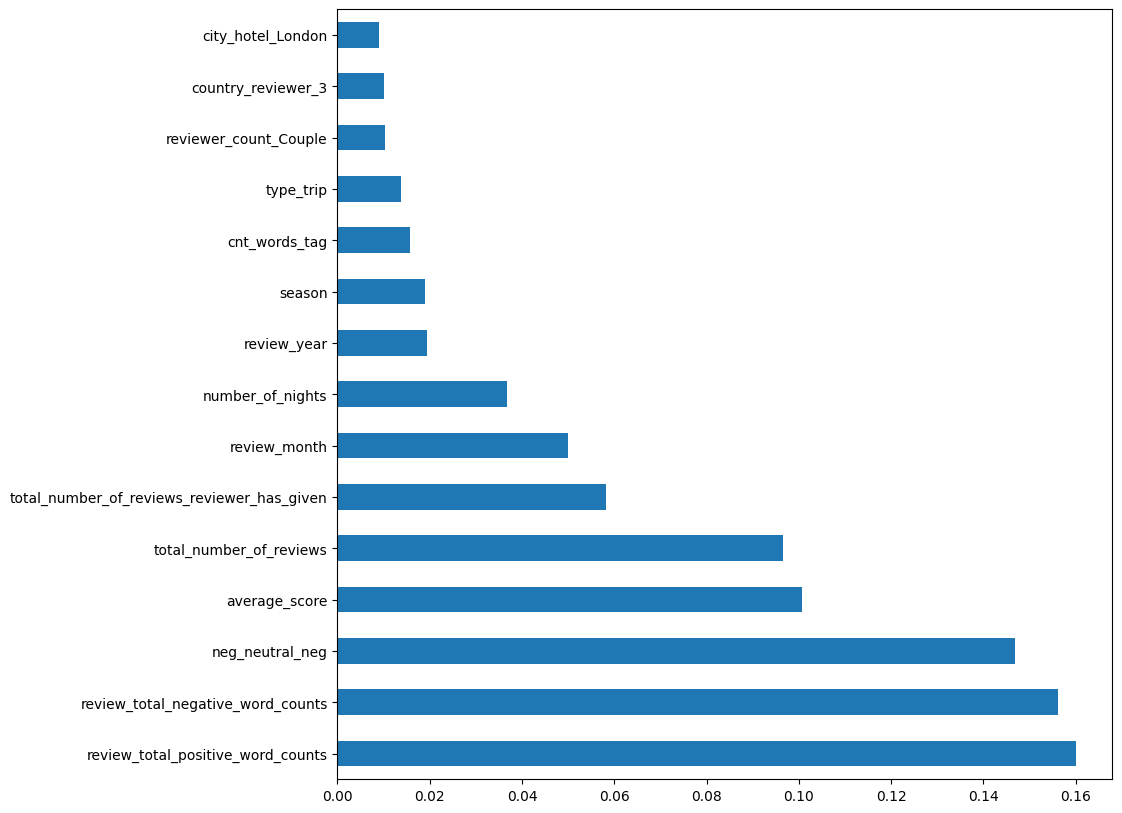

In [73]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [74]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,review_year,review_month,season,cnt_words_tag,...,reviewer_count_Solo traveler,reviewer_count_Family with young children,reviewer_count_Family with older children,reviewer_count_Travelers with friends,city_hotel_Milan,city_hotel_Amsterdam,city_hotel_Barcelona,city_hotel_London,city_hotel_Paris,city_hotel_Vienna
97897,8.9,15,567,0,1,0.0,2016,6,2,4,...,0,0,0,0,1,0,0,0,0,0
58375,9.0,0,935,40,1,0.0,2017,1,3,5,...,0,0,0,0,0,0,1,0,0,0
17841,8.2,24,2996,41,2,0.0,2016,3,1,4,...,0,0,0,0,0,0,0,1,0,0
71139,8.3,27,1105,19,5,0.0,2015,9,4,4,...,0,1,0,0,0,0,0,0,0,1
113929,8.5,6,2901,6,7,0.0,2016,11,4,4,...,1,0,0,0,1,0,0,0,0,0
53355,8.5,3,3980,3,3,0.0,2016,1,3,4,...,0,0,0,0,0,0,0,1,0,0
59915,8.8,2,1039,12,1,0.0,2017,5,1,5,...,0,0,0,0,0,0,0,1,0,0
90834,8.7,0,2332,6,1,0.0,2017,3,1,5,...,0,0,0,0,0,0,0,1,0,0
29838,8.4,0,2398,14,1,0.0,2015,10,4,4,...,0,1,0,0,0,0,0,0,1,0
63649,7.9,44,272,10,1,0.0,2016,4,1,5,...,0,0,0,0,0,0,0,1,0,0


In [75]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [76]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [77]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.0s finished


In [78]:
predict_submission

array([8.548     , 6.896     , 8.385     , ..., 7.731     , 9.521     ,
       7.35066667])

In [79]:
list(sample_submission)

['reviewer_score', 'id']

In [80]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.548,488440
1,6.896,274649
2,8.385,374688
3,9.531,404352
4,9.663,451596
5,8.839,302161
6,7.719,317079
7,7.903,13963
8,8.747,159785
9,8.321,195089
